In [1]:
import h5py
import numpy
import os
import scipy.io

In [2]:
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches
from matplotlib import colormaps as cm

In [3]:
from utils.path import RAW_SA
from utils import file

In [4]:
rawX = scipy.io.loadmat(os.path.join(RAW_SA, 'Salinas.mat'))['salinas']
rawX = numpy.transpose(rawX, (2, 0, 1))
rawY = scipy.io.loadmat(os.path.join(RAW_SA, 'Salinas_gt.mat'))['salinas_gt']

## Spatially disjoint train/test split

The training mask is specified here as `trMask`, followed by its visualization. We try to keep the number of training samples for each class similar. Correspoinding `vaMask` is also provided.

In [5]:
trMask = numpy.zeros_like(rawY)

# 1 - Brocoli green weeds 1
trMask[265:275, 4:14] = 1
trMask[258:268, 18:28] = 1
trMask[250:260, 32:42] = 1
trMask[243:253, 46:56] = 1
trMask[238:248, 60:70] = 1

# 2 - Brocoli green weeds 2
trMask[195:215, 130:150] = 1
trMask[225:235, 115:125] = 1

# 3 - Fallow
trMask[165:175, 157:177] = 1
trMask[153:163, 167:177] = 1
trMask[179:189, 179:189] = 1
trMask[192:202, 192:202] = 1

# 4 - Fallow rough plow
tmp = rawY == 4
tmp[:10, :] = False
tmp[24:, :] = False
trMask[tmp] = 1

tmp = rawY == 4
tmp[:61, :] = False
tmp[80:, :] = False
trMask[tmp] = 1

tmp = rawY == 4
tmp[:120, :] = False
tmp[140:, :] = False
trMask[tmp] = 1

# 5 - Fallow smooth
tmp = rawY == 5
tmp[:10, :] = False
tmp[18:, :] = False
trMask[tmp] = 1

tmp = rawY == 5
tmp[:60, :] = False
tmp[69:, :] = False
trMask[tmp] = 1

tmp = rawY == 5
tmp[:120, :] = False
tmp[129:, :] = False
trMask[tmp] = 1

# 6 - Stubble
tmp = rawY == 6
tmp[:5, :] = False
tmp[10:, :] = False
trMask[tmp] = 1

tmp = rawY == 6
tmp[:50, :] = False
tmp[57:, :] = False
trMask[tmp] = 1

tmp = rawY == 6
tmp[:110, :] = False
tmp[115:, :] = False
trMask[tmp] = 1

# 7 - Celery
tmp = rawY == 7
tmp[:3, :] = False
tmp[4:, :] = False
trMask[tmp] = 1

tmp = rawY == 7
tmp[:25, :] = False
tmp[34:, :] = False
trMask[tmp] = 1

tmp = rawY == 7
tmp[:95, :] = False
tmp[100:, :] = False
trMask[tmp] = 1

# 8 - Grapes untrained
trMask[135:145, 40:50] = 1
trMask[135:145, 80:90] = 1
trMask[170:180, 40:50] = 1
trMask[170:180, 80:90] = 1
trMask[227:237, 5:15] = 1

# 9 - Soil vinyard develop
trMask[395:405, 20:30] = 1
trMask[420:430, 45:65] = 1
trMask[450:460, 60:80] = 1

# 10 - Corn senesced green weeds
tmp = rawY == 10
tmp[:, :10] = False
tmp[:, 15:] = False
trMask[tmp] = 1

tmp = rawY == 10
tmp[:, :40] = False
tmp[:, 45:] = False
trMask[tmp] = 1

tmp = rawY == 10
tmp[:, :70] = False
tmp[:, 74:] = False
trMask[tmp] = 1

tmp = rawY == 10
tmp[:, :100] = False
tmp[:, 105:] = False
trMask[tmp] = 1

# 11 - Lettuce romaine 4wk
tmp = rawY == 11
tmp[:, :10] = False
tmp[:, 25:] = False
trMask[tmp] = 1

tmp = rawY == 11
tmp[:, :40] = False
tmp[:, 55:] = False
trMask[tmp] = 1

tmp = rawY == 11
tmp[:, :70] = False
tmp[:, 85:] = False
trMask[tmp] = 1

# 12 - Lettuce romaine 5wk
tmp = rawY == 12
tmp[:, :10] = False
tmp[:, 19:] = False
trMask[tmp] = 1

tmp = rawY == 12
tmp[:, :40] = False
tmp[:, 49:] = False
trMask[tmp] = 1

tmp = rawY == 12
tmp[:, :70] = False
tmp[:, 79:] = False
trMask[tmp] = 1

# 13 - Lettuce romaine 6wk
tmp = rawY == 13
tmp[:, :10] = False
tmp[:, 30:] = False
trMask[tmp] = 1

tmp = rawY == 13
tmp[:, :40] = False
tmp[:, 60:] = False
trMask[tmp] = 1

tmp = rawY == 13
tmp[:, :75] = False
tmp[:, 98:] = False
trMask[tmp] = 1

# 14 - Lettuce romaine 7wk
tmp = rawY == 14
tmp[:, :10] = False
tmp[:, 28:] = False
trMask[tmp] = 1

tmp = rawY == 14
tmp[:, :40] = False
tmp[:, 58:] = False
trMask[tmp] = 1

tmp = rawY == 14
tmp[:, :75] = False
tmp[:, 92:] = False
trMask[tmp] = 1

# 15 - Vinyard untrained
trMask[40:60, 30:50] = 1
trMask[80:90, 10:20] = 1

# 16 - Vinyard vertical trellis
trMask[485:505, 5:25] = 1
trMask[465:475, 7:17] = 1

In [6]:
vaMask = (rawY != 0).astype(int) - trMask
# obs = 16
# plt.imshow((rawY-trMask)==obs)
# (rawY==obs).sum() - ((rawY-trMask)==obs).sum()

In [7]:
name2Idx = {
    "Background": 0,
    "Brocoli green weeds 1": 1,
    "Brocoli green weeds 2": 2,
    "Fallow": 3,
    "Fallow rough plow": 4,
    "Fallow smooth": 5,
    "Stubble": 6,
    "Celery": 7,
    "Grapes untrained": 8,
    "Soil vinyard develop": 9,
    "Corn senesced green weeds": 10,
    "Lettuce romaine 4wk": 11,
    "Lettuce romaine 5wk": 12,
    "Lettuce romaine 6wk": 13,
    "Lettuce romaine 7wk": 14,
    "Vinyard untrained": 15,
    "Vinyard vertical trellis": 16
}

(-0.5, 216.5, 511.5, -0.5)

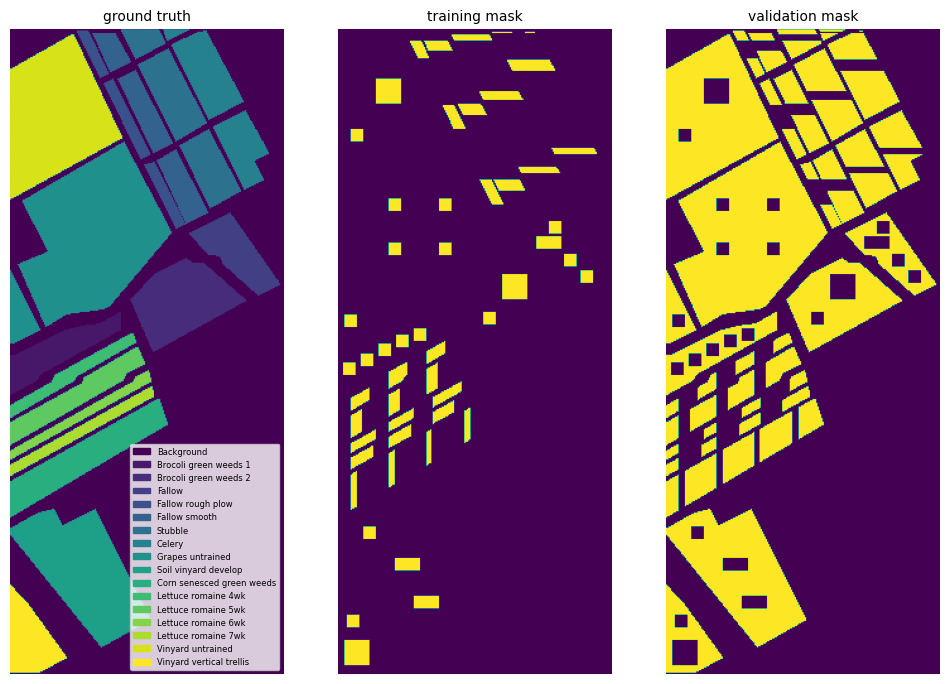

In [8]:
plt.figure(figsize=(12, 10))
plt.subplot(131)
plt.imshow(rawY, cmap='viridis')
cmap = cm['viridis'].resampled(len(name2Idx))
patches =[mpatches.Patch(color=cmap(name2Idx[land]), label=land) for land in name2Idx.keys()]
plt.legend(handles=patches, prop={'size': 6}, loc='lower right')
plt.title('ground truth', fontsize=10)
plt.axis('off')
plt.subplot(132)
plt.imshow(trMask)
plt.title('training mask', fontsize=10)
plt.axis('off')
plt.subplot(133)
plt.imshow(vaMask)
plt.title('validation mask', fontsize=10)
plt.axis('off')

In [9]:
trMask = trMask.astype(bool)
vaMask = vaMask.astype(bool)

In [10]:
print('Basic statistics for Salinas:\n')
print("#all\t#train\t#test".rjust(49))
totalAll, totalTra, totalVal = 0, 0, 0
for land in name2Idx.keys():
    thisAll = numpy.sum(rawY==name2Idx[land])
    thisTra = numpy.sum(rawY[trMask]==name2Idx[land])
    thisVal = numpy.sum(rawY[vaMask]==name2Idx[land])
    totalAll += thisAll
    totalTra += thisTra
    totalVal += thisVal
    print(f"{land:>30}:\t{thisAll}\t{thisTra}\t{thisVal}")
print(f"{'':<25}Total:\t{totalAll}\t{totalTra}\t{totalVal}")

Basic statistics for Salinas:

                                #all	#train	#test
                    Background:	56975	0	0
         Brocoli green weeds 1:	2009	500	1509
         Brocoli green weeds 2:	3726	500	3226
                        Fallow:	1976	500	1476
             Fallow rough plow:	1394	503	891
                 Fallow smooth:	2678	513	2165
                       Stubble:	3959	527	3432
                        Celery:	3579	502	3077
              Grapes untrained:	11271	500	10771
          Soil vinyard develop:	6203	500	5703
     Corn senesced green weeds:	3278	514	2764
           Lettuce romaine 4wk:	1068	497	571
           Lettuce romaine 5wk:	1927	502	1425
           Lettuce romaine 6wk:	916	502	414
           Lettuce romaine 7wk:	1070	499	571
             Vinyard untrained:	7268	500	6768
      Vinyard vertical trellis:	1807	500	1307
                         Total:	111104	8059	46070


In [11]:
print(rawX.shape, rawY.shape, trMask.shape, vaMask.shape)
with h5py.File('../Salinas.h5', 'w') as h5w:
    h5w.create_dataset('HSI', data=rawX)
    h5w.create_dataset('gt', data=rawY)
    h5w.create_dataset('trMask', data=trMask)
    h5w.create_dataset('vaMask', data=vaMask)

(224, 512, 217) (512, 217) (512, 217) (512, 217)
